Chapter 23

# 不同自由度的卡方分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用卡方分布的累积分布函数 (CDF) 计算和可视化马氏距离（Mahal d）与置信水平 $\alpha$ 的关系。设定多个自由度 $ \text{df} $ 值，并绘制不同维度下的马氏距离分布曲线，以显示不同距离下的概率范围。

1. **卡方分布的百分位数**：代码计算给定置信水平 $(0.9, 0.95, 0.99)$ 的卡方分布平方根值，即在$\text{df}=1$ 和 $\text{df}=2$ 条件下的卡方分布距离。
   对于 $\text{df}=2$ 的情况，计算了不同置信水平下的卡方分布距离范围，并获得其平方根值：
   $$
   \text{Mahal d} = \sqrt{\chi^2(p, \text{df})}
   $$
   
2. **绘制马氏距离的累积分布曲线**：对马氏距离 $x$ 从0到4，绘制其在不同自由度 $(\text{df} = 1, 2, 3, 4, 5, 6)$ 下的累积分布函数曲线，反映距离平方 $x^2$ 所对应的置信水平范围。每个 $\text{df}$ 曲线表明给定马氏距离下的累积概率，便于查看在多维情况下马氏距离对应的置信水平 $\alpha$ 关系。

   最终图形中，横轴为马氏距离 $\sigma$，纵轴为置信水平 $\alpha$。该可视化展示了在不同维度下的马氏距离随概率变化的特征，使得不同维数下的马氏距离解释具有更直观的概率意义。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
from scipy.stats.distributions import chi2  # 导入卡方分布模块

## 计算马氏距离对应的卡方分布分位数

In [2]:
intervals = np.linspace(0.9, 0.99, 11)  # 设置置信区间
dist_chi2_sqrt = np.sqrt(chi2.ppf(intervals, df=2))  # 根据卡方分布计算分位数对应的马氏距离

## 计算标准差倍数对应的概率

In [3]:
num_sigma = np.linspace(1, 3, 3)  # 设置标准差的倍数范围
prob = chi2.cdf(num_sigma ** 2, df=2)  # 计算不同倍数标准差的累积分布概率

## 绘制不同自由度的卡方分布

Text(0, 0.5, '$\\alpha$')

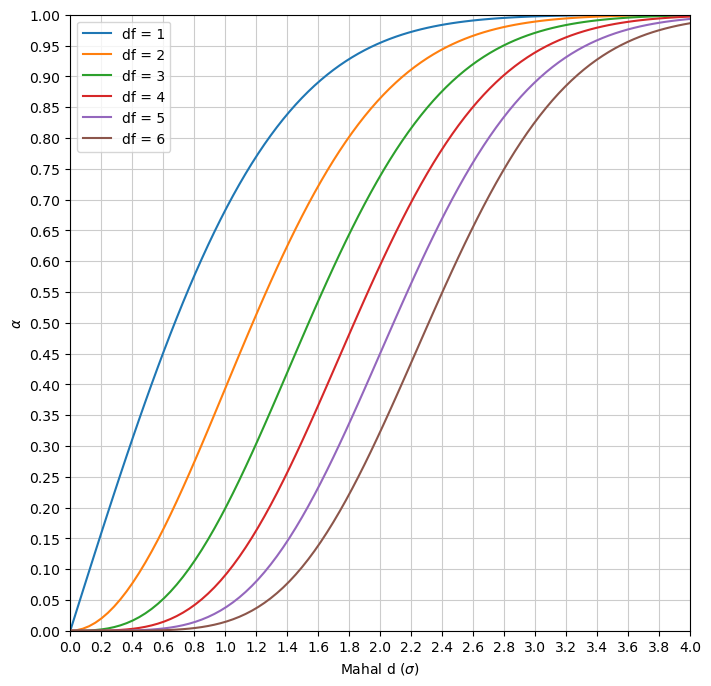

In [6]:
x = np.linspace(0, 4, 100)  # 设置x轴的马氏距离范围

fig, ax = plt.subplots(figsize=(8, 8))  # 创建绘图窗口

for df in [1, 2, 3, 4, 5, 6]:  # 遍历不同的自由度
    prob_x_df_D = chi2.cdf(x ** 2, df=df)  # 计算不同自由度的累积分布概率
    plt.plot(x, prob_x_df_D, label='df = ' + str(df))  # 绘制不同自由度下的曲线

plt.grid(color=(0.8, 0.8, 0.8))  # 设置网格颜色
plt.legend()  # 显示图例
plt.yticks(np.linspace(0, 1, 21))  # 设置y轴刻度
plt.xticks(np.linspace(0, 4, 21))  # 设置x轴刻度

plt.xlim(0, 4)  # 设置x轴显示范围
plt.ylim(0, 1)  # 设置y轴显示范围
plt.xlabel(r'Mahal d ($\sigma$)')  # 设置x轴标签
plt.ylabel(r'$\alpha$')  # 设置y轴标签